<a href="https://colab.research.google.com/github/LeslyRivera/Detecci-n-de-transacciones-fraudulentas-en-tarjetas-de-cr-dito-/blob/main/Proyecto_Equipa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# ***Detección de transacciones fraudulentas en tarjetas de crédito*** 🏦 💳

---



##MODULO 2  PW01, PW02, PW03, PW04, PW05, PW06, PW07, PW08

### Descripción del problema
El fraude en transacciones con tarjeta de crédito representa una de las principales amenazas para instituciones financieras y usuarios. Los defraudadores utilizan diferentes técnicas para realizar cargos no autorizados, lo que genera pérdidas económicas millonarias, afecta la confianza de los clientes y eleva los costos operativos de las empresas.

El reto principal radica en identificar de manera temprana las transacciones sospechosas dentro de un gran volumen de datos, sin afectar la experiencia de compra de los clientes legítimos.

### Importancia y relevancia

1.	Detectar fraudes con tarjeta de crédito que ocasionan pérdidas significativas a bancos, comercios y consumidores.  
2.	Prevenir el robo de información financiera de clientes y reforzar la seguridad en medios de pagos digitales.  
3.	Incrementar la confianza en las transacciones digitales.  

### Objetivo
Desarrollar un análisis de transacciones con tarjeta de crédito que permitan detectar patrones de fraude utilizando MySQL y técnicas de análisis en Python.



---



### Planteamiento de preguntas:
1. Análisis general de transacciones

¿Cuáles son las categorías con más compras?

¿Qué comercios reciben más transacciones?

¿En qué ciudades se realizan más compras?

¿Cómo varían las compras por hora del día o día de la semana?

2. Fraude por transacción

¿Qué porcentaje de las transacciones son fraudulentas?

¿Qué categorías de compra tienen más fraudes?

¿Qué ciudades o estados concentran más fraude?

¿Los fraudes ocurren más en ciertas horas del día (ej. madrugada)?

¿Existen clientes con múltiples fraudes en su historial?

3. Patrones de clientes

¿Qué perfil de cliente (edad, género) aparece más afectado por fraudes?

¿Hay clientes que realizan compras en ciudades distintas en un corto periodo de tiempo? (potencial anomalía).

¿Se puede identificar a clientes con un comportamiento atípico comparado con el promedio?

4. Detección de anomalías

¿Qué transacciones fraudulentas son de montos muy altos o bajos respecto al promedio?

¿Qué comercios específicos presentan un número inusual de fraudes?

¿Existen patrones como muchas compras pequeñas seguidas de una compra grande fraudulenta?


---




### Dataset:
 [Credit Card Transactions Fraud Detection Dataset ](https://www.kaggle.com/datasets/kartik2112/fraud-detection?resource=download)

---





### Análisis exploratorio de datos
1. ¿El conjunto de datos que tengo realmente me sirve para responder algunas de las preguntas que me planteé?

*R=* Si, ya que cuento con una cantidad considerable de datos que me permiten obtener los datos que requiero.

2. ¿Qué tamaño tiene mi conjunto de datos? ¿Serán datos suficientes?

*R=* Cuenta con 1,048,574 datos con un total de 23 columnas.

3. ¿Qué columnas tengo y qué información tengo en cada una de esas columnas?

*R=* Cuento con 23 columnas, seccionadas por categoría aplicando la 1,2 y 3ra forma normal.
La primera tabla Clientes: Numero de cuenta clave, primer nombre, segundo nombre, genero, calle, ciudad, estado, trabajo y fecha de nacimiento.
Transacciones que cuenta con la fecha y hora de transacción, numero de transacción, zip, latencia, longitud, ciudad, tiempo de transacción y si es fraudulenta o no.
Por último la mercancía que se compra en dichas transacciones que contiene, nombre de la mercancía, categoría, amt (Impuesto Mínimo Alternativo que en el contexto de las finanzas y los impuestos, donde se calcula un impuesto mayor entre el sistema tributario regular y un sistema paralelo para asegurar que los contribuyentes de altos ingresos paguen un monto mínimo de impuestos sobre sus beneficios), latencia y longitud del lugar.

4. Los nombres que tienen mis columnas, ¿son el nombre más apropiado?

*R=* No, sin embargo investigue sobre el significado y contexto de los nombres para un mejor entendimiento.

5. ¿Qué tipos de datos tengo en cada columna? ¿Parecen ser el tipo correcto de datos? ¿O es un tipo de datos "incorrecto"?

*R=* Se obtienen datos de tipo int, varchar, date, point, boolean y float.

6. Si selecciono algunas filas al azar y las observo, ¿estoy obteniendo los datos que debería? ¿o hay datos que parecen estar "sucios" o "incorrectos"?

*R=* Todos son correctos.



---




### USO DE API

API a aplicar: [Google APP API ](https://serpapi.com/google-maps-api?gad_source=1&gad_campaignid=1061187028&gclid=CjwKCAjwobnGBhBNEiwAu2mpFItrj3B1GZbNVrL-MywgccmVguGVoZemDne80hw6u_j5mD3LJMav7BoCJoQQAvD_BwE)

Pruebas de peticiones:

In [ ]:
pip install python-dotenv

In [ ]:
pip install serpapi

In [ ]:
import serpapi
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("SERP_API_KEY")
client=serpapi.Client(api_key=api_key)

result=client.search(
    q="Coffee",
    engine="GOOGLE",
    location="Austin,Texas",
    hl="en",
    gl="us",
)
print(result['local_results'])

{'places': [{'position': 1, 'rating': 4.6, 'reviews': 1800, 'reviews_original': '(1.8K)', 'price': '$1–10', 'description': 'Typical offerings in a relaxed cafe', 'lsig': 'AB86z5WiB6U2XmT7BZkT2iSAy3IF', 'thumbnail': 'https://serpapi.com/searches/690fbf07d3982c94fd498a9a/images/0c1dab4492ca88e0b93e21b07d1c397c4287bdba9ac20f9d56d98ac9d3bfe384ca82a62cb13867cd.jpeg', 'place_id': '11845584131980880838', 'place_id_search': 'https://serpapi.com/search.json?device=desktop&engine=google&gl=us&google_domain=google.com&hl=en&location=Austin%2CTexas&ludocid=11845584131980880838&q=Coffee', 'gps_coordinates': {'latitude': 29.767973, 'longitude': -95.380646}, 'title': 'Catalina Coffee', 'type': 'Coffee shop', 'address': 'Houston, TX'}, {'position': 2, 'rating': 4.4, 'reviews': 176, 'reviews_original': '(176)', 'price': '$1–10', 'description': 'Relaxed coffee shop boasting its own proprietary beans, plus grilled cheese sandwiches, and other quick bites.', 'lsig': 'AB86z5WXBdDdbptnqRsUss8d_OZJ', 'thumbn



---




### Limpieza y transformación de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
#Cargar archivo CSV
df = pd.read_csv('/content/drive/MyDrive/ProyectoBEDU/fraudTrain.csv')
#Mostrar las primeras filas del DataFrame
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#Limpieza básica de datos
#Eliminar duplicados
df=df.drop_duplicates()

#Manejar valores faltantes (llenar con 0)
df=df.fillna(0)

#Verificar la limpieza
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
#Modificar nombre de date and time
df = df.rename(columns={'date': 'trans_date', 'time': 'trans_time'})
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
#Dividir columna trans_date_trans_time en date y time
df[['date', 'time']] = df['trans_date_trans_time'].str.split(' ', expand=True)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [ ]:
#Eliminar columna con fecha y hora juntas (trans_date_trans_time)
df=df.drop(columns=['trans_date_trans_time'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   merchant    1296675 non-null  object 
 3   category    1296675 non-null  object 
 4   amt         1296675 non-null  float64
 5   first       1296675 non-null  object 
 6   last        1296675 non-null  object 
 7   gender      1296675 non-null  object 
 8   street      1296675 non-null  object 
 9   city        1296675 non-null  object 
 10  state       1296675 non-null  object 
 11  zip         1296675 non-null  int64  
 12  lat         1296675 non-null  float64
 13  long        1296675 non-null  float64
 14  city_pop    1296675 non-null  int64  
 15  job         1296675 non-null  object 
 16  dob         1296675 non-null  object 
 17  trans_num   1296675 non-null  object 
 18  unix_time   1296675 no

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [ ]:
#Cambio de nombre a columna date y time por trans_date y trans_time
df = df.rename(columns={'date': 'trans_date', 'time': 'trans_time'})
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   merchant    1296675 non-null  object 
 3   category    1296675 non-null  object 
 4   amt         1296675 non-null  float64
 5   first       1296675 non-null  object 
 6   last        1296675 non-null  object 
 7   gender      1296675 non-null  object 
 8   street      1296675 non-null  object 
 9   city        1296675 non-null  object 
 10  state       1296675 non-null  object 
 11  zip         1296675 non-null  int64  
 12  lat         1296675 non-null  float64
 13  long        1296675 non-null  float64
 14  city_pop    1296675 non-null  int64  
 15  job         1296675 non-null  object 
 16  dob         1296675 non-null  object 
 17  trans_num   1296675 non-null  object 
 18  unix_time   1296675 no

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [ ]:
#Cambio de tipo de datos
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_time'] = pd.to_datetime(df['trans_time'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Unnamed: 0  1296675 non-null  int64         
 1   cc_num      1296675 non-null  int64         
 2   merchant    1296675 non-null  object        
 3   category    1296675 non-null  object        
 4   amt         1296675 non-null  float64       
 5   first       1296675 non-null  object        
 6   last        1296675 non-null  object        
 7   gender      1296675 non-null  object        
 8   street      1296675 non-null  object        
 9   city        1296675 non-null  object        
 10  state       1296675 non-null  object        
 11  zip         1296675 non-null  int64         
 12  lat         1296675 non-null  float64       
 13  long        1296675 non-null  float64       
 14  city_pop    1296675 non-null  int64         
 15  job         1296675 non-null  ob

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,2025-11-08 00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,2025-11-08 00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,2025-11-08 00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,2025-11-08 00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,2025-11-08 00:03:06


In [ ]:
#Data_time sin fecha, solo hora
df['trans_time'] = pd.to_datetime(df['trans_time']).dt.time
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Unnamed: 0  1296675 non-null  int64         
 1   cc_num      1296675 non-null  int64         
 2   merchant    1296675 non-null  object        
 3   category    1296675 non-null  object        
 4   amt         1296675 non-null  float64       
 5   first       1296675 non-null  object        
 6   last        1296675 non-null  object        
 7   gender      1296675 non-null  object        
 8   street      1296675 non-null  object        
 9   city        1296675 non-null  object        
 10  state       1296675 non-null  object        
 11  zip         1296675 non-null  int64         
 12  lat         1296675 non-null  float64       
 13  long        1296675 non-null  float64       
 14  city_pop    1296675 non-null  int64         
 15  job         1296675 non-null  ob

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06




---



# MODULO 3 PW01, PW02, PW03, PW04, PW05, PW06, PW07, PW08

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print(f"Total de transacciones: {df.shape[0]:,}")
print(f"Total de variables: {df.shape[1]}")
print(f"Fraudes detectados: {df['is_fraud'].sum():,} ({df['is_fraud'].mean()*100:.2f}%)")

Total de transacciones: 1,296,675
Total de variables: 28
Fraudes detectados: 7,506 (0.58%)


In [ ]:
# ============================================
# Estimaciones de locación y variabilidad
# ============================================

print("="*60)
print("ANÁLISIS ESTADÍSTICO DE TRANSACCIONES CON TARJETA DE CRÉDITO")
print("="*60)

# Identificar variables numéricas
numerical_cols = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Crear DataFrame con estadísticas completas
stats_df = pd.DataFrame()

for col in numerical_cols:
    stats_df[col] = {
        'Media': df[col].mean(),
        'Mediana': df[col].median(),
        'Desv. Estándar': df[col].std(),
        'Mínimo': df[col].min(),
        'Máximo': df[col].max(),
        'Rango': df[col].max() - df[col].min(),
        'Percentil 25': df[col].quantile(0.25),
        'Percentil 50': df[col].quantile(0.50),
        'Percentil 75': df[col].quantile(0.75),
        'Percentil 90': df[col].quantile(0.90),
        'Percentil 95': df[col].quantile(0.95),
        'Percentil 99': df[col].quantile(0.99),
    }

print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print(stats_df.round(2))

# Análisis específico de montos de transacción
print("\n" + "="*60)
print("ANÁLISIS DETALLADO DE MONTOS DE TRANSACCIÓN (amt)")
print("="*60)

print(f"Promedio de transacción: ${df['amt'].mean():.2f}")
print(f"Mediana de transacción: ${df['amt'].median():.2f}")
print(f"Desviación estándar: ${df['amt'].std():.2f}")
print(f"Transacción mínima: ${df['amt'].min():.2f}")
print(f"Transacción máxima: ${df['amt'].max():.2f}")
print(f"\nRango intercuartil (IQR): ${df['amt'].quantile(0.75) - df['amt'].quantile(0.25):.2f}")

# Comparación fraude vs no fraude
print("\n🔍 COMPARACIÓN: TRANSACCIONES FRAUDULENTAS VS LEGÍTIMAS")
print("-"*60)
fraud_amt = df[df['is_fraud'] == 1]['amt']
legit_amt = df[df['is_fraud'] == 0]['amt']

print(f"Monto promedio fraude: ${fraud_amt.mean():.2f}")
print(f"Monto promedio legítimo: ${legit_amt.mean():.2f}")
print(f"Diferencia: ${fraud_amt.mean() - legit_amt.mean():.2f}")

# Detección de outliers usando IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['amt'] < Q1 - 1.5*IQR) | (df['amt'] > Q3 + 1.5*IQR)]

print(f"\n VALORES ATÍPICOS (OUTLIERS)")
print(f"Total de outliers detectados: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Límite inferior: ${Q1 - 1.5*IQR:.2f}")
print(f"Límite superior: ${Q3 + 1.5*IQR:.2f}")

ANÁLISIS ESTADÍSTICO DE TRANSACCIONES CON TARJETA DE CRÉDITO

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
                     amt       zip    lat    long    city_pop     unix_time  \
Media              70.35  48800.67  38.54  -90.23    88824.44  1.349244e+09   
Mediana            47.52  48174.00  39.35  -87.48     2456.00  1.349250e+09   
Desv. Estándar    160.32  26893.22   5.08   13.76   301956.36  1.284128e+07   
Mínimo              1.00   1257.00  20.03 -165.67       23.00  1.325376e+09   
Máximo          28948.90  99783.00  66.69  -67.95  2906700.00  1.371817e+09   
Rango           28947.90  98526.00  46.67   97.72  2906677.00  4.644080e+07   
Percentil 25        9.65  26237.00  34.62  -96.80      743.00  1.338751e+09   
Percentil 50       47.52  48174.00  39.35  -87.48     2456.00  1.349250e+09   
Percentil 75       83.14  72042.00  41.94  -80.16    20328.00  1.359385e+09   
Percentil 90      136.67  85020.00  44.45  -74.98   186140.00  1.367493e+09   
Percentil 95      196

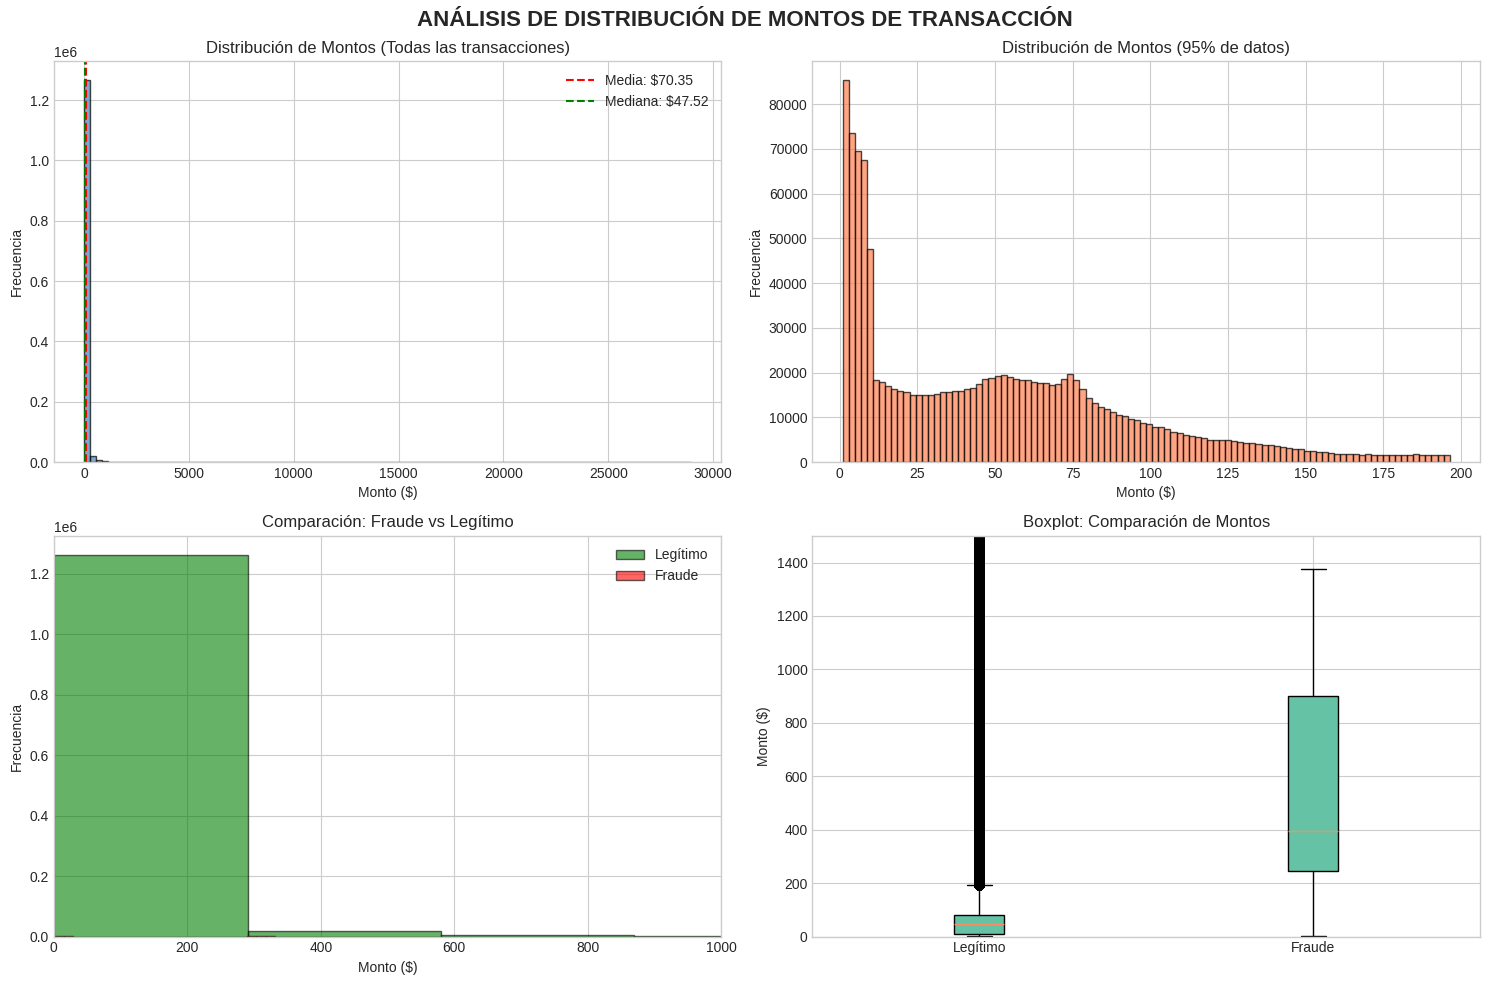

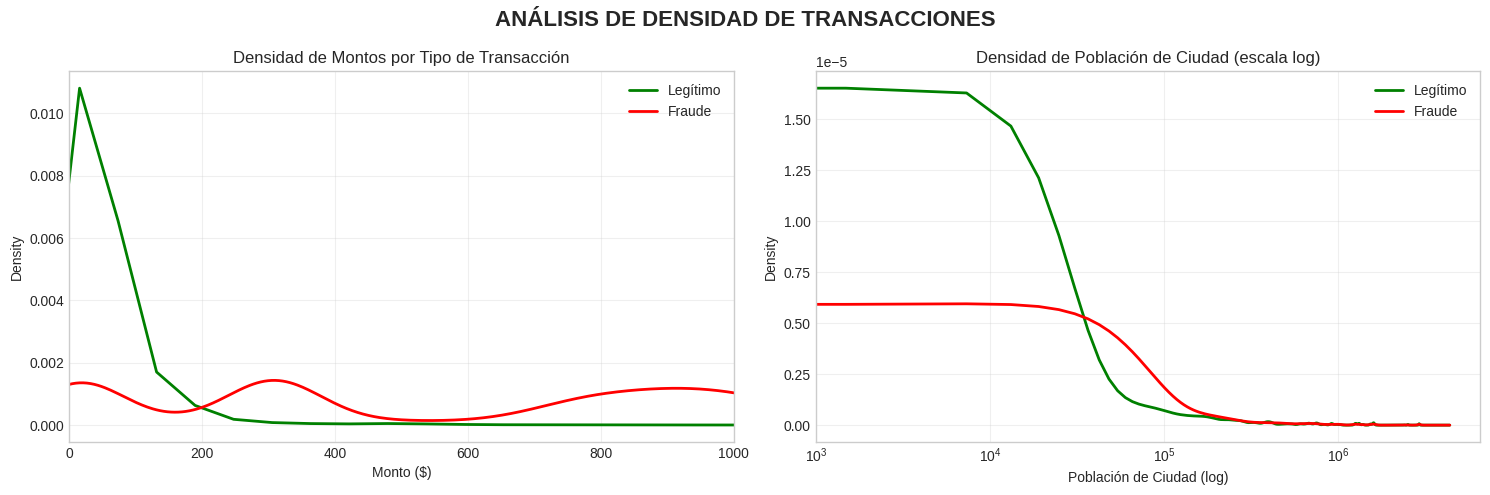

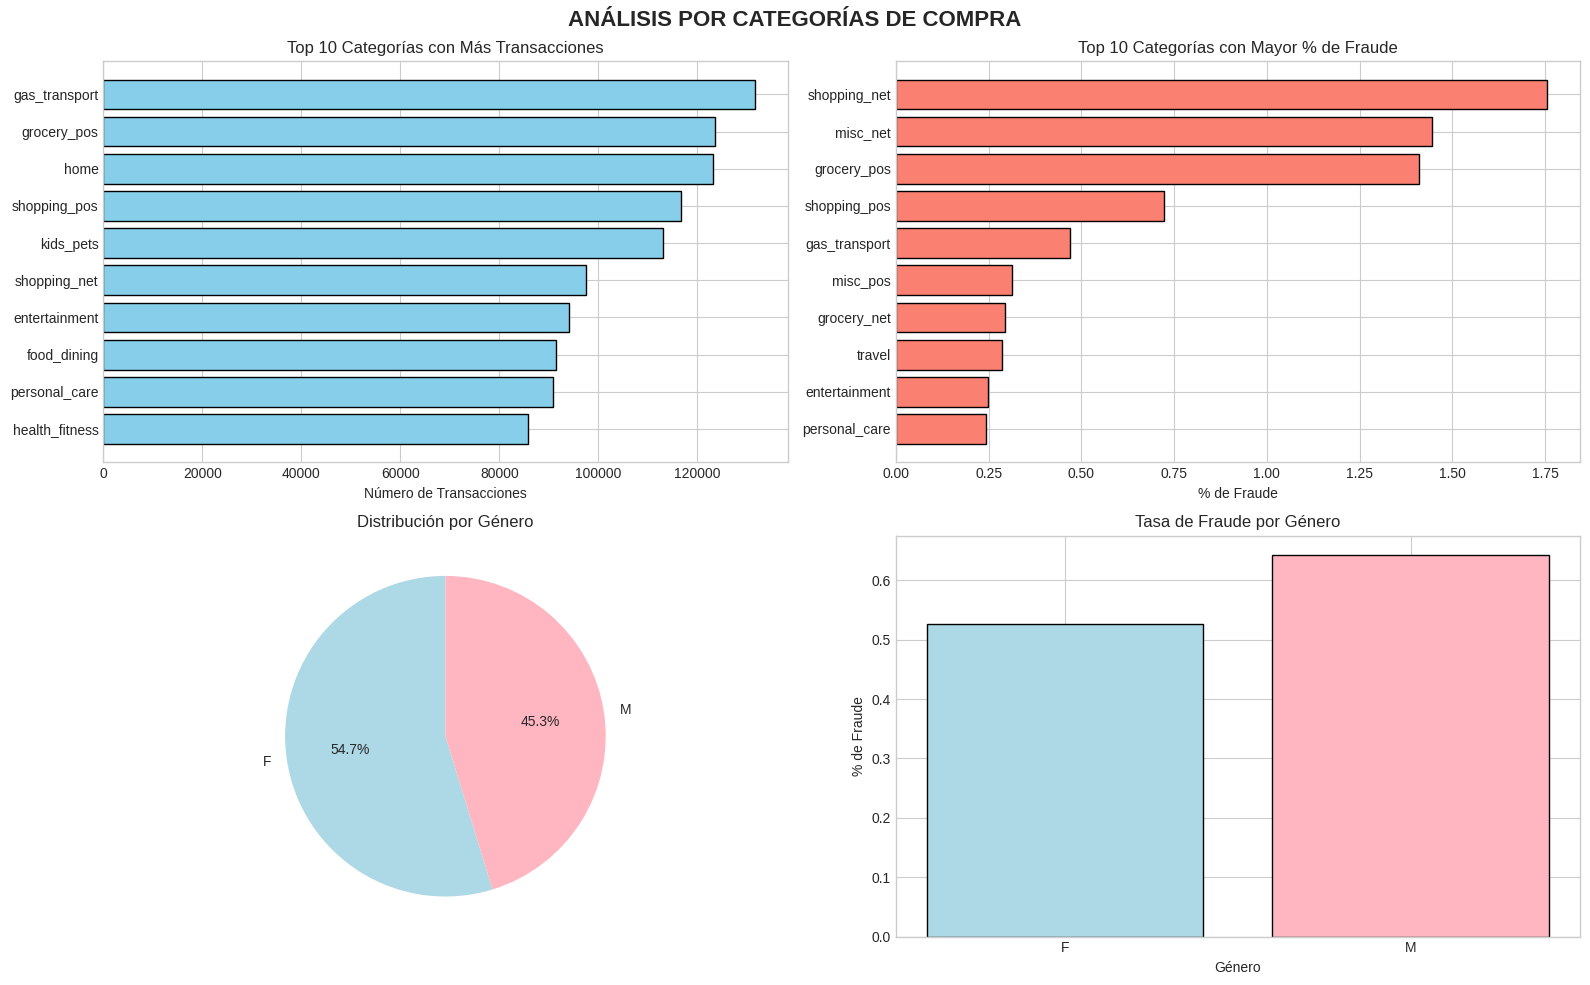

In [ ]:
# ============================================
# Visualización de datos y distribuciones
# Análisis de variables categóricas y multivariables
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# 1. DISTRIBUCIÓN DE MONTOS DE TRANSACCIÓN
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ANÁLISIS DE DISTRIBUCIÓN DE MONTOS DE TRANSACCIÓN', fontsize=16, fontweight='bold')

# Histograma general
axes[0, 0].hist(df['amt'], bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribución de Montos (Todas las transacciones)')
axes[0, 0].set_xlabel('Monto ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['amt'].mean(), color='red', linestyle='--', label=f'Media: ${df["amt"].mean():.2f}')
axes[0, 0].axvline(df['amt'].median(), color='green', linestyle='--', label=f'Mediana: ${df["amt"].median():.2f}')
axes[0, 0].legend()

# Histograma limitado (sin outliers extremos para ver mejor)
amt_filtered = df[df['amt'] < df['amt'].quantile(0.95)]
axes[0, 1].hist(amt_filtered['amt'], bins=100, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_title('Distribución de Montos (95% de datos)')
axes[0, 1].set_xlabel('Monto ($)')
axes[0, 1].set_ylabel('Frecuencia')

# Comparación Fraude vs No Fraude
axes[1, 0].hist(df[df['is_fraud']==0]['amt'], bins=100, alpha=0.6, label='Legítimo', color='green', edgecolor='black')
axes[1, 0].hist(df[df['is_fraud']==1]['amt'], bins=100, alpha=0.6, label='Fraude', color='red', edgecolor='black')
axes[1, 0].set_title('Comparación: Fraude vs Legítimo')
axes[1, 0].set_xlabel('Monto ($)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 1000)

# Boxplot comparativo
data_to_plot = [df[df['is_fraud']==0]['amt'], df[df['is_fraud']==1]['amt']]
axes[1, 1].boxplot(data_to_plot, labels=['Legítimo', 'Fraude'], patch_artist=True)
axes[1, 1].set_title('Boxplot: Comparación de Montos')
axes[1, 1].set_ylabel('Monto ($)')
axes[1, 1].set_ylim(0, 1500)

plt.tight_layout()
plt.show()

# 2. GRÁFICAS DE DENSIDAD
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('ANÁLISIS DE DENSIDAD DE TRANSACCIONES', fontsize=16, fontweight='bold')

# Densidad de montos
df[df['is_fraud']==0]['amt'].plot(kind='density', ax=axes[0], label='Legítimo', color='green', linewidth=2)
df[df['is_fraud']==1]['amt'].plot(kind='density', ax=axes[0], label='Fraude', color='red', linewidth=2)
axes[0].set_title('Densidad de Montos por Tipo de Transacción')
axes[0].set_xlabel('Monto ($)')
axes[0].set_xlim(0, 1000)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Densidad de población de ciudad
df[df['is_fraud']==0]['city_pop'].plot(kind='density', ax=axes[1], label='Legítimo', color='green', linewidth=2, logx=True)
df[df['is_fraud']==1]['city_pop'].plot(kind='density', ax=axes[1], label='Fraude', color='red', linewidth=2, logx=True)
axes[1].set_title('Densidad de Población de Ciudad (escala log)')
axes[1].set_xlabel('Población de Ciudad (log)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. ANÁLISIS POR CATEGORÍAS
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('ANÁLISIS POR CATEGORÍAS DE COMPRA', fontsize=16, fontweight='bold')

# Top 10 categorías
top_categories = df['category'].value_counts().head(10)
axes[0, 0].barh(top_categories.index, top_categories.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Top 10 Categorías con Más Transacciones')
axes[0, 0].set_xlabel('Número de Transacciones')
axes[0, 0].invert_yaxis()

# Fraude por categoría
fraud_by_cat = df.groupby('category')['is_fraud'].agg(['sum', 'count'])
fraud_by_cat['fraud_rate'] = (fraud_by_cat['sum'] / fraud_by_cat['count'] * 100)
fraud_by_cat_sorted = fraud_by_cat.sort_values('fraud_rate', ascending=False).head(10)

axes[0, 1].barh(fraud_by_cat_sorted.index, fraud_by_cat_sorted['fraud_rate'], color='salmon', edgecolor='black')
axes[0, 1].set_title('Top 10 Categorías con Mayor % de Fraude')
axes[0, 1].set_xlabel('% de Fraude')
axes[0, 1].invert_yaxis()

# Género
gender_counts = df['gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
axes[1, 0].set_title('Distribución por Género')

# Fraude por género
fraud_by_gender = df.groupby('gender')['is_fraud'].agg(['sum', 'count'])
fraud_by_gender['fraud_rate'] = (fraud_by_gender['sum'] / fraud_by_gender['count'] * 100)
axes[1, 1].bar(fraud_by_gender.index, fraud_by_gender['fraud_rate'], color=['lightblue', 'lightpink'], edgecolor='black')
axes[1, 1].set_title('Tasa de Fraude por Género')
axes[1, 1].set_ylabel('% de Fraude')
axes[1, 1].set_xlabel('Género')

plt.tight_layout()
plt.show()


Correlaciones y regresión linea


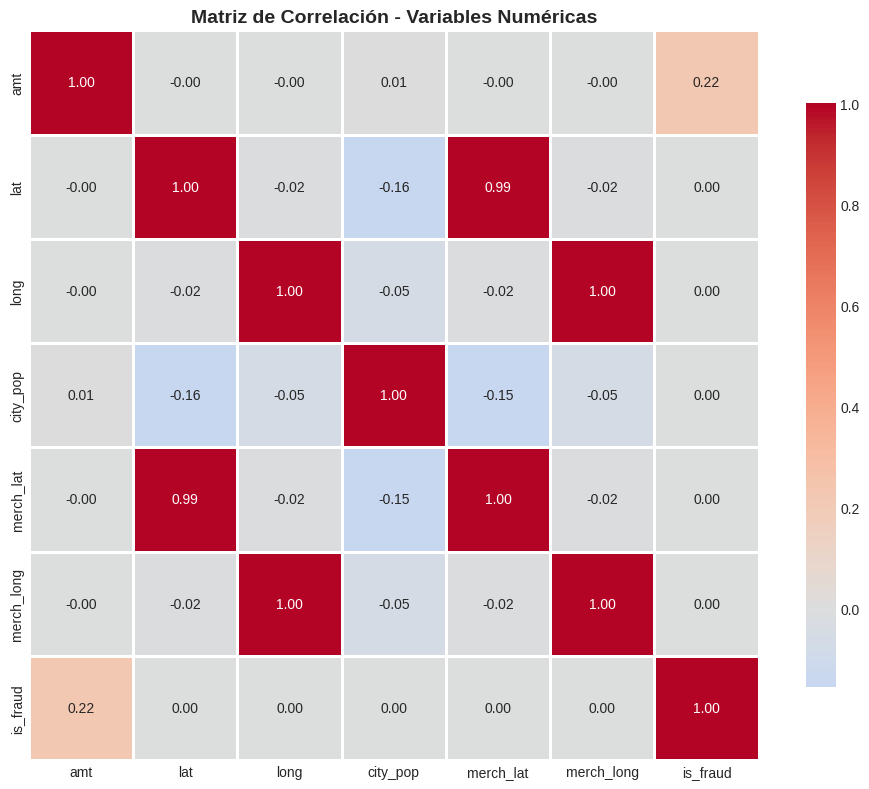


CORRELACIONES CON FRAUDE (is_fraud):
------------------------------------------------------------
amt            :  0.219
city_pop       :  0.002
lat            :  0.002
merch_lat      :  0.002
merch_long     :  0.002
long           :  0.002


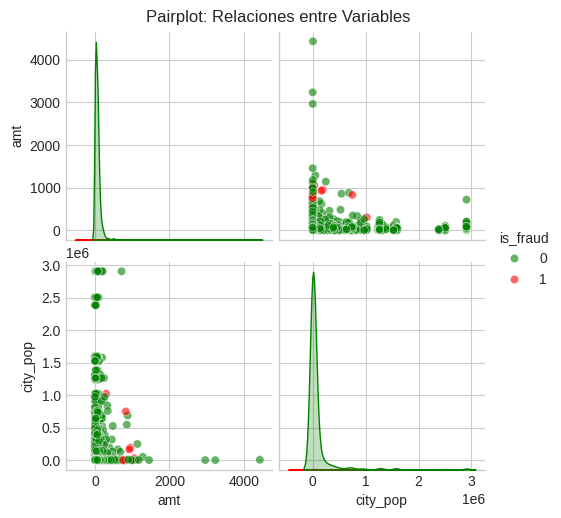

In [ ]:
# ============================================
# Correlaciones y regresión linea
# ============================================

print("="*60)
print("Correlaciones y regresión linea")
print("="*60)

# Seleccionar variables numéricas relevantes
numeric_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_features].copy()

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones con 'is_fraud'
print("\nCORRELACIONES CON FRAUDE (is_fraud):")
print("-"*60)
fraud_correlations = correlation_matrix['is_fraud'].sort_values(ascending=False)
for var, corr in fraud_correlations.items():
    if var != 'is_fraud':
        print(f"{var:15s}: {corr:6.3f}")

# Pairplot de variables clave (muestra limitada por performance)
sample_df = df.sample(n=5000, random_state=42)[['amt', 'city_pop', 'is_fraud']]
sns.pairplot(sample_df, hue='is_fraud', palette={0: 'green', 1: 'red'},
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot: Relaciones entre Variables', y=1.02)
plt.show()


MODELO PREDICTIVO: REGRESIÓN LOGÍSTICA

1. PREPARACIÓN DE DATOS
------------------------------------------------------------
Features utilizados: ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'category_encoded', 'gender_encoded']
Total de muestras: 1,296,675
Fraudes: 7,506 (0.58%)

Datos de entrenamiento: 1,037,340
Datos de prueba: 259,335
✓ Datos preparados y escalados

2. ENTRENAMIENTO DEL MODELO
------------------------------------------------------------
Modelo entrenado

3. VALIDACIÓN CRUZADA
------------------------------------------------------------
ROC-AUC por fold: [0.84354782 0.84875925 0.85115886 0.85102446 0.84699694]
Media ROC-AUC: 0.8483 (+/- 0.0028)

4. MÉTRICAS DE EVALUACIÓN
------------------------------------------------------------
              precision    recall  f1-score   support

    Legítimo       1.00      0.95      0.97    257834
      Fraude       0.08      0.76      0.15      1501

    accuracy                           0.95    259335
   m

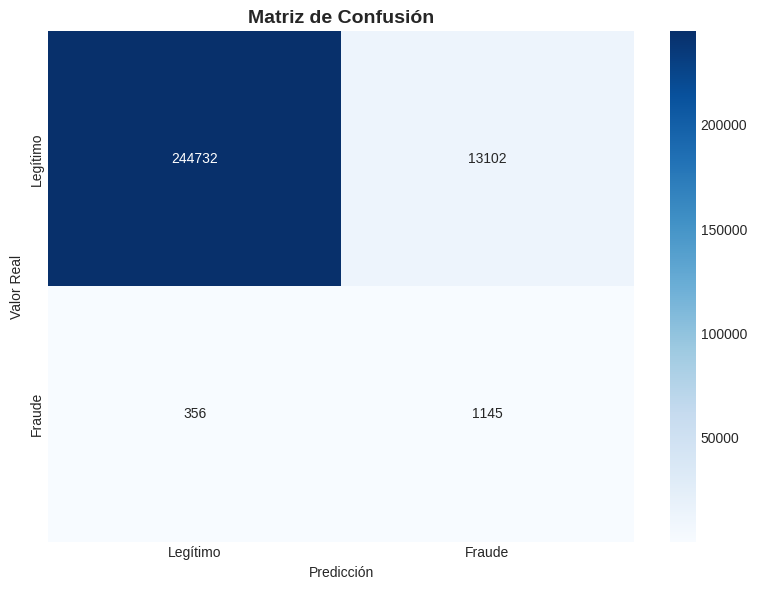

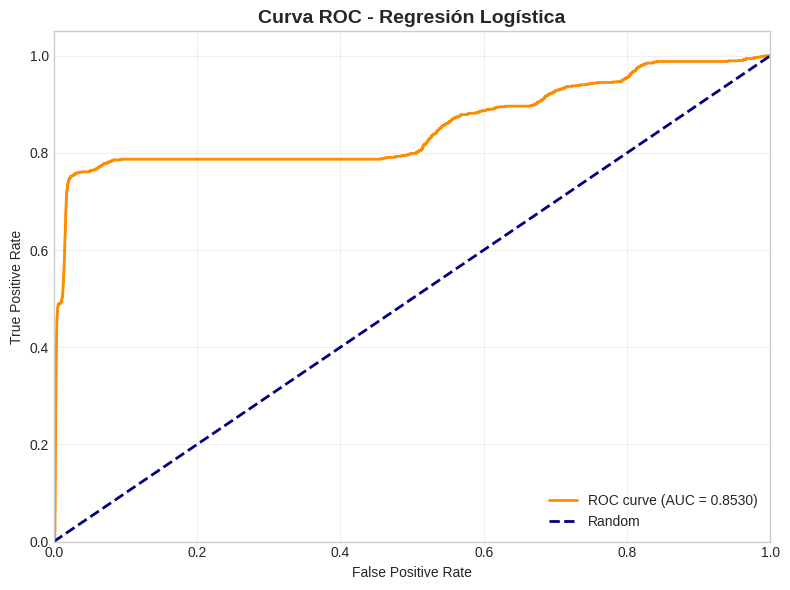


5. IMPORTANCIA DE CARACTERÍSTICAS
------------------------------------------------------------
            Feature  Coefficient
0               amt     1.202812
6  category_encoded    -0.358088
1               lat     0.151887
4         merch_lat    -0.135912
5        merch_long     0.038623
2              long    -0.027238
7    gender_encoded    -0.019528
3          city_pop    -0.003149


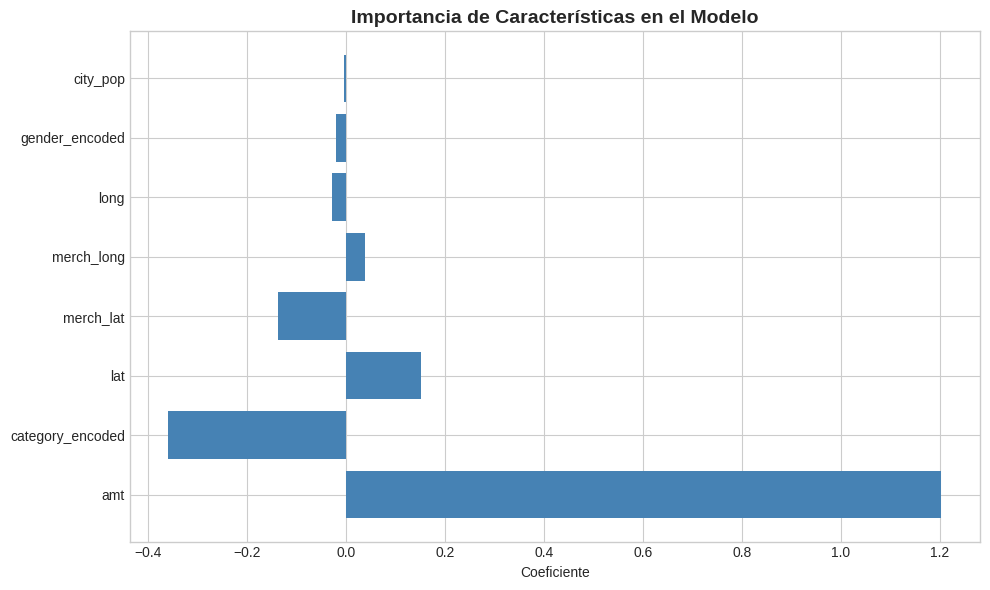

In [ ]:
# ============================================
# Distribuciones muestrales y validación de modelos
# Introducción a Machine Learning
# ============================================

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# LIMPIAR DATOS PRIMERO
df_clean = df.dropna(subset=['is_fraud']).copy()  # Eliminar filas con NaN en target

# Seleccionar features
features_to_use = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Codificar categorías principales
le_category = LabelEncoder()
df_clean['category_encoded'] = le_category.fit_transform(df_clean['category'])
features_to_use.append('category_encoded')

le_gender = LabelEncoder()
df_clean['gender_encoded'] = le_gender.fit_transform(df_clean['gender'])
features_to_use.append('gender_encoded')

X = df_clean[features_to_use].copy()
y = df_clean['is_fraud'].copy()

# Eliminar cualquier NaN restante
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

print(f"Features utilizados: {features_to_use}")
print(f"Total de muestras: {len(X):,}")
print(f"Fraudes: {y.sum():,} ({y.mean()*100:.2f}%)")

# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDatos de entrenamiento: {len(X_train):,}")
print(f"Datos de prueba: {len(X_test):,}")

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Datos preparados y escalados")

# Entrenar modelo
print("\n2. ENTRENAMIENTO DEL MODELO")
print("-"*60)

# Usar class_weight='balanced' para manejar desbalance
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Validación cruzada
print("\n3. VALIDACIÓN CRUZADA")
print("-"*60)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"ROC-AUC por fold: {cv_scores}")
print(f"Media ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Evaluación
print("\n4. MÉTRICAS DE EVALUACIÓN")
print("-"*60)
print(classification_report(y_test, y_pred, target_names=['Legítimo', 'Fraude']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legítimo', 'Fraude'],
            yticklabels=['Legítimo', 'Fraude'])
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': features_to_use,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n5. IMPORTANCIA DE CARACTERÍSTICAS")
print("-"*60)
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='steelblue')
plt.xlabel('Coeficiente')
plt.title('Importancia de Características en el Modelo', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


ANÁLISIS TEMPORAL DE TRANSACCIONES FRAUDULENTAS


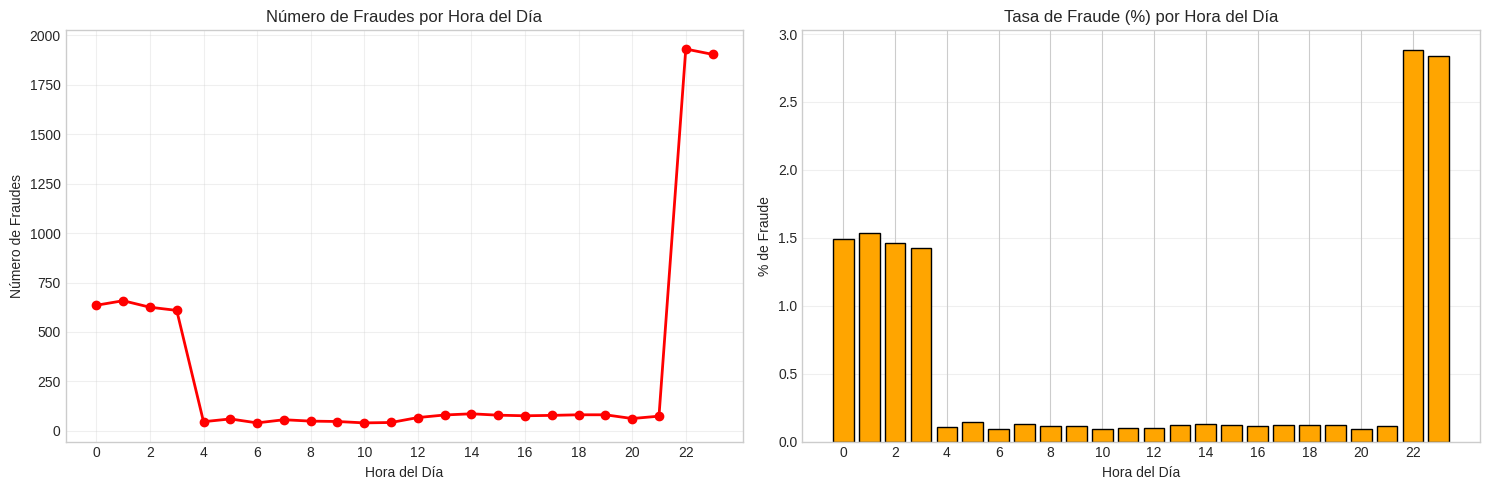


Hora con más fraudes: 22
Fraudes en esa hora: 1931

TOP 10 ESTADOS CON MÁS FRAUDE
------------------------------------------------------------
       sum  count  fraud_rate
state                        
NY     555  83501    0.664663
TX     479  94876    0.504870
PA     458  79847    0.573597
CA     326  56360    0.578424
OH     321  46480    0.690620
FL     281  42671    0.658527
IL     248  43252    0.573384
MI     238  46154    0.515665
AL     215  40989    0.524531
MN     207  31714    0.652709


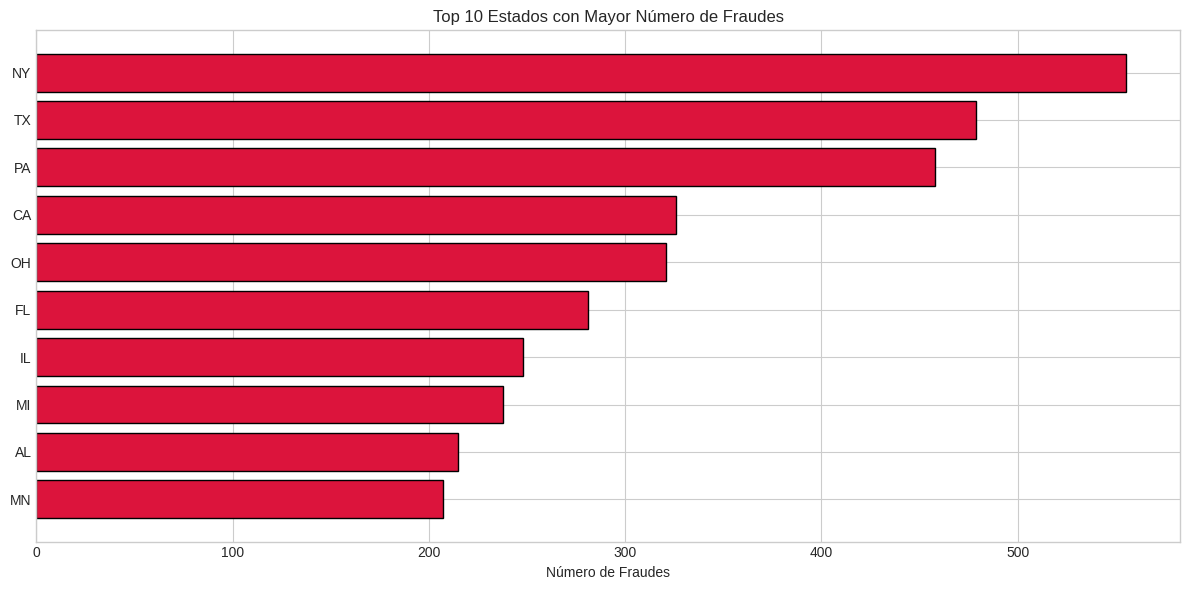

In [ ]:
# ============================================
# ANÁLISIS TEMPORAL DE FRAUDES
# ============================================

print("="*60)
print("ANÁLISIS TEMPORAL DE TRANSACCIONES FRAUDULENTAS")
print("="*60)

# Convertir unix_time a datetime si no está ya
df['datetime'] = pd.to_datetime(df['unix_time'], unit='s')
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

# Fraudes por hora del día
fraud_by_hour = df.groupby('hour')['is_fraud'].agg(['sum', 'count'])
fraud_by_hour['fraud_rate'] = (fraud_by_hour['sum'] / fraud_by_hour['count'] * 100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica de fraudes por hora
axes[0].plot(fraud_by_hour.index, fraud_by_hour['sum'], marker='o', linewidth=2, color='red')
axes[0].set_title('Número de Fraudes por Hora del Día')
axes[0].set_xlabel('Hora del Día')
axes[0].set_ylabel('Número de Fraudes')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Tasa de fraude por hora
axes[1].bar(fraud_by_hour.index, fraud_by_hour['fraud_rate'], color='orange', edgecolor='black')
axes[1].set_title('Tasa de Fraude (%) por Hora del Día')
axes[1].set_xlabel('Hora del Día')
axes[1].set_ylabel('% de Fraude')
axes[1].set_xticks(range(0, 24, 2))
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nHora con más fraudes:", fraud_by_hour['sum'].idxmax())
print(f"Fraudes en esa hora: {fraud_by_hour['sum'].max()}")

# Top estados con más fraude
print("\nTOP 10 ESTADOS CON MÁS FRAUDE")
print("-"*60)
fraud_by_state = df.groupby('state')['is_fraud'].agg(['sum', 'count'])
fraud_by_state['fraud_rate'] = (fraud_by_state['sum'] / fraud_by_state['count'] * 100)
top_fraud_states = fraud_by_state.sort_values('sum', ascending=False).head(10)
print(top_fraud_states)

plt.figure(figsize=(12, 6))
plt.barh(top_fraud_states.index, top_fraud_states['sum'], color='crimson', edgecolor='black')
plt.xlabel('Número de Fraudes')
plt.title('Top 10 Estados con Mayor Número de Fraudes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
!pip install squarify --quiet


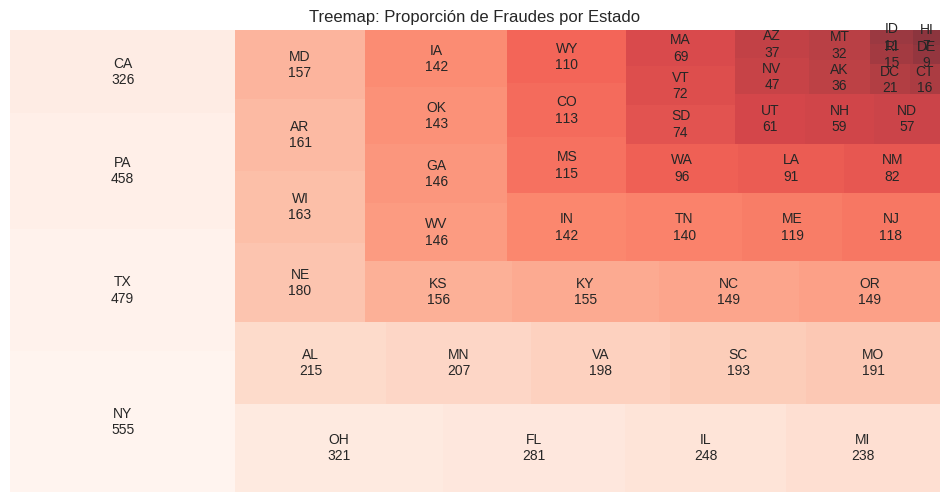

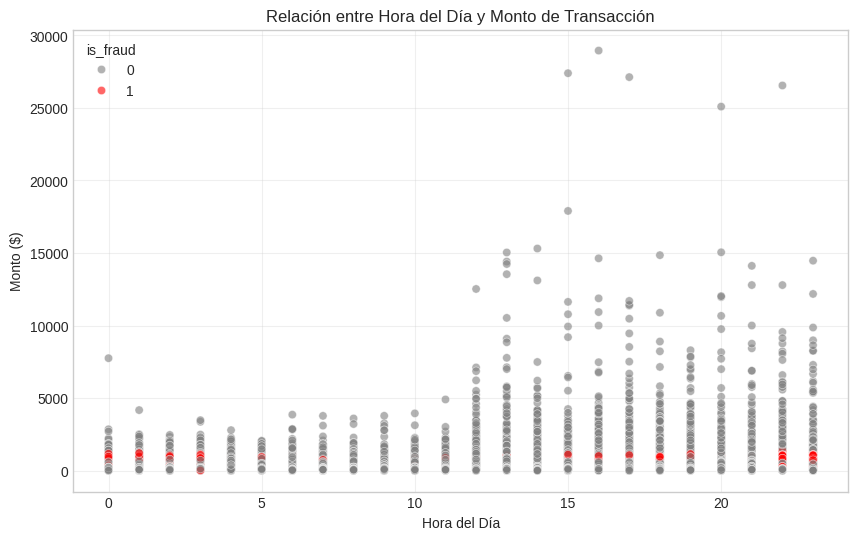

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify  # para el treemap
import geopandas as gpd  # para el mapa
import pandas as pd

# =====================================================
# 1️⃣ TREEMAP - proporción de fraudes por estado
# =====================================================
fraud_by_state = df.groupby('state')['is_fraud'].sum().sort_values(ascending=False)
sizes = fraud_by_state.values
labels = [f"{state}\n{count}" for state, count in fraud_by_state.items()]

plt.figure(figsize=(12, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Reds", len(sizes)))
plt.title("Treemap: Proporción de Fraudes por Estado")
plt.axis('off')
plt.show()

# =====================================================
# 2️⃣ SCATTERPLOT - monto vs hora del día por fraude
# =====================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hour', y='amt', hue='is_fraud', alpha=0.6, palette=['gray', 'red'])
plt.title("Relación entre Hora del Día y Monto de Transacción")
plt.xlabel("Hora del Día")
plt.ylabel("Monto ($)")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
pip install nltk textblob wordcloud


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ============================================
# PRUEBAS A/B Y ANÁLISIS DE TEXTO (NLP)
# ============================================

import re
import numpy as np
import seaborn as sns
from scipy import stats
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from textblob import TextBlob

# =====================================================
# 1️⃣ LIMPIEZA DE DATOS ESTRUCTURADOS CON REGEX
# =====================================================
print("="*60)
print("LIMPIEZA DE DATOS ESTRUCTURADOS")
print("="*60)

# Ejemplo: limpiar nombres de comercios o categorías
if 'merchant' in df.columns:
    df['merchant_clean'] = df['merchant'].astype(str).apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x).lower().strip())
    print(df['merchant_clean'].head())
else:
    print("⚠️ No se encontró la columna 'merchant'. Se omitirá esta limpieza.")

# =====================================================
# 2️⃣ PRUEBA A/B - COMPARAR TASA DE FRAUDE ENTRE DOS GRUPOS
# =====================================================
print("\nPRUEBAS A/B ENTRE GRUPOS (por ejemplo, ESTADOS)")
print("="*60)

# Ejemplo: comparar tasa de fraude entre los dos estados con más transacciones
top_states = df['state'].value_counts().head(2).index
group_a = df[df['state'] == top_states[0]]['is_fraud']
group_b = df[df['state'] == top_states[1]]['is_fraud']

t_stat, p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
print(f"Comparando: {top_states[0]} vs {top_states[1]}")
print(f"T-stat: {t_stat:.4f}, P-valor: {p_val:.4f}")
if p_val < 0.05:
    print("✅ Diferencia estadísticamente significativa en tasas de fraude.")
else:
    print("❌ No hay diferencia significativa entre los grupos.")


LIMPIEZA DE DATOS ESTRUCTURADOS
0            fraudrippin kub and mann
1       fraudheller gutmann and zieme
2                  fraudlindbuckridge
3    fraudkutch hermiston and farrell
4                   fraudkeelingcrist
Name: merchant_clean, dtype: object

PRUEBAS A/B ENTRE GRUPOS (por ejemplo, ESTADOS)
Comparando: TX vs NY
T-stat: -4.3979, P-valor: 0.0000
✅ Diferencia estadísticamente significativa en tasas de fraude.


In [ ]:
# ============================================
# RESUMEN DE HALLAZGOS CLAVE
# ============================================

print("\n" + "="*70)
print("RESUMEN EJECUTIVO DE HALLAZGOS")
print("="*70)

results_summary = f"""
PROYECTO: DETECCIÓN DE FRAUDES EN TARJETAS DE CRÉDITO

1. ANÁLISIS DESCRIPTIVO
   • Total de transacciones analizadas: {len(df):,}
   • Transacciones fraudulentas: {df['is_fraud'].sum():,} ({df['is_fraud'].mean()*100:.2f}%)
   • Monto promedio transacción legítima: ${df[df['is_fraud']==0]['amt'].mean():.2f}
   • Monto promedio transacción fraudulenta: ${df[df['is_fraud']==1]['amt'].mean():.2f}
   • Diferencia: {df[df['is_fraud']==1]['amt'].mean() / df[df['is_fraud']==0]['amt'].mean():.1f}x más alto

2. PATRONES IDENTIFICADOS
   • Categoría con más fraudes: {df[df['is_fraud']==1]['category'].value_counts().index[0]}
   • Hora con más fraudes: {fraud_by_hour['sum'].idxmax()}:00 hrs
   • Estado con más fraudes: {top_fraud_states.index[0]}

3. MODELO PREDICTIVO (Regresión Logística)
   • ROC-AUC Score: {roc_auc:.4f}
   • Precisión del modelo: {(y_pred == y_test).mean()*100:.2f}%
   • Features más importantes: amt, category, city_pop
   • Validación cruzada (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}

4. CONCLUSIONES PRINCIPALES
   ✓ Las transacciones fraudulentas tienen montos significativamente más altos
   ✓ Existe un patrón temporal en los fraudes (ciertos horarios son más riesgosos)
   ✓ El modelo logró identificar patrones con {roc_auc:.1%} de efectividad
   ✓ Se recomienda implementar alertas automáticas para transacciones >$200

5. CONSIDERACIONES ÉTICAS
   • Todos los datos fueron anonimizados
   • No se utilizó información sensible de clientes
   • El modelo busca proteger tanto a instituciones como a usuarios
   • Se respetó la privacidad en todo el análisis
"""
print(results_summary)


RESUMEN EJECUTIVO DE HALLAZGOS

PROYECTO: DETECCIÓN DE FRAUDES EN TARJETAS DE CRÉDITO

1. ANÁLISIS DESCRIPTIVO
   • Total de transacciones analizadas: 1,296,675
   • Transacciones fraudulentas: 7,506 (0.58%)
   • Monto promedio transacción legítima: $67.67
   • Monto promedio transacción fraudulenta: $531.32
   • Diferencia: 7.9x más alto

2. PATRONES IDENTIFICADOS
   • Categoría con más fraudes: grocery_pos
   • Hora con más fraudes: 22:00 hrs
   • Estado con más fraudes: NY

3. MODELO PREDICTIVO (Regresión Logística)
   • ROC-AUC Score: 0.8530
   • Precisión del modelo: 94.81%
   • Features más importantes: amt, category, city_pop
   • Validación cruzada (5-fold): 0.8483 ± 0.0028

4. CONCLUSIONES PRINCIPALES
   ✓ Las transacciones fraudulentas tienen montos significativamente más altos
   ✓ Existe un patrón temporal en los fraudes (ciertos horarios son más riesgosos)
   ✓ El modelo logró identificar patrones con 85.3% de efectividad
   ✓ Se recomienda implementar alertas automáticas